# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_heart=pd.read_csv('cardio_train.csv',sep=";")
df_heart

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# EXPLORATORY DATA ANALYSIS

In [3]:
df_heart.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df_heart.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df_heart.shape

(69301, 13)

In [6]:
df_heart.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
df_heart.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
df_heart.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#df_heart.drop(df_heart.columns[[3,4,5,6]],axis=1,inplace=True)

In [11]:
#sns.heatmap(df_heart.isnull(),annot=True)

In [12]:
df_heart.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

CHECKING OUTLIERS

In [13]:
z=np.abs(zscore(df_heart))
print(z.shape)
print(np.where(z>3))

(69301, 13)
(array([    3,     3,    13, ..., 69296, 69297, 69298], dtype=int64), array([ 9, 10,  8, ...,  9,  4, 10], dtype=int64))


REMOVING OUTLIERS

In [14]:
df_final=df_heart.loc[(z<3).all(axis=1)]
print(df_final.shape)

(55140, 13)


CHECKING DATA SKEWNESS

In [15]:
df_heart.skew()

id             -0.001317
age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

BOXPLOT

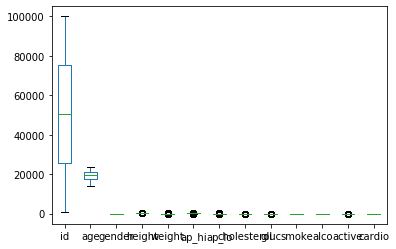

In [16]:
df_final.plot.box()

CORRELATION

In [17]:
df_final.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.004214,0.002342,-0.002198,-0.002756,-0.001020,-0.001923,0.003875,0.005393,NaN,NaN,0.006280,0.002173
age,0.004214,1.000000,-0.005419,-0.073038,0.072887,0.200268,0.152011,0.131987,0.033427,NaN,NaN,-0.006522,0.245128
gender,0.002342,-0.005419,1.000000,0.496879,0.155455,0.051635,0.062157,-0.038825,-0.015127,NaN,NaN,-0.010528,0.018402
height,-0.002198,-0.073038,0.496879,1.000000,0.301333,0.002709,0.025204,-0.067832,-0.027179,NaN,NaN,-0.018475,-0.012772
weight,-0.002756,0.072887,0.155455,0.301333,1.000000,0.238357,0.227248,0.134056,0.091440,NaN,NaN,-0.015561,0.178276
ap_hi,-0.001020,0.200268,0.051635,0.002709,0.238357,1.000000,0.605754,0.177561,0.075746,NaN,NaN,0.000387,0.397260
ap_lo,-0.001923,0.152011,0.062157,0.025204,0.227248,0.605754,1.000000,0.135642,0.059676,NaN,NaN,-0.006386,0.312876
cholesterol,0.003875,0.131987,-0.038825,-0.067832,0.134056,0.177561,0.135642,1.000000,0.194388,NaN,NaN,0.018057,0.210733
gluc,0.005393,0.033427,-0.015127,-0.027179,0.091440,0.075746,0.059676,0.194388,1.000000,NaN,NaN,-0.013192,0.056245
smoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PAIRPLOT

In [18]:
#sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [19]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0        988  22469       1     155    69.0    130     80            2     2   
1        989  14648       1     163    71.0    110     70            1     1   
2        990  21901       1     165    70.0    120     80            1     1   
4        992  23393       1     155    62.0    120     80            1     1   
5        995  21143       1     164    61.0    100     70            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69293  99990  18792       1     161    56.0    170     90            1     1   
69294  99991  19699       1     172    70.0    130     90            1     1   
69295  99992  21074       1     165    80.0    150     80            1     1   
69299  99998  22431       1     163    72.0    135     80            1     2   
69300  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  
0         

STANDARD SCALER

In [20]:
ss=StandardScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.skew()

id            -0.002602
age           -0.289501
gender         0.902729
height         0.098899
weight         0.574304
ap_hi         -0.252020
ap_lo          4.735143
cholesterol    2.018967
gluc           3.202861
smoke          0.000000
alco           0.000000
active        -1.498342
dtype: float64

# TRAINING AND TESTING - VARIOUS MODELS

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=64,stratify=y)

In [22]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(38598, 12) (16542, 12)
(38598,) (16542,)


CLASSIFIERS

In [23]:
knn=KNeighborsClassifier(n_neighbors=10)
sv=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=64)
rfc=RandomForestClassifier()

In [24]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('DecisionTreeClassifier',dtc))
models.append(('LogisticRegression',lr))
models.append(('RandomForestClassifier',rfc))

FUNCTION DECLARATION

************* KNeighborsClassifier *************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy Score =  0.7165397170837867


cross_val_score =  0.7106093659558319


classification_report
               precision    recall  f1-score   support

           0       0.69      0.80      0.75      8524
           1       0.75      0.62      0.68      8018

    accuracy                           0.72     16542
   macro avg       0.72      0.71      0.71     16542
weighted avg       0.72      0.72      0.71     16542



[[6850 1674]
 [3015 5003]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************* SVC *************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol

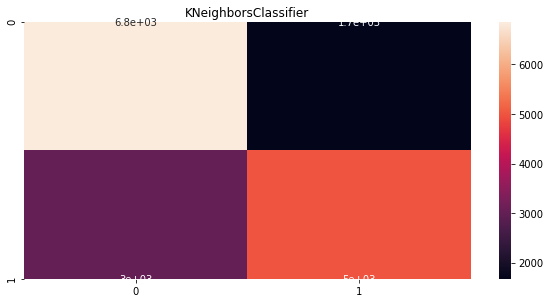

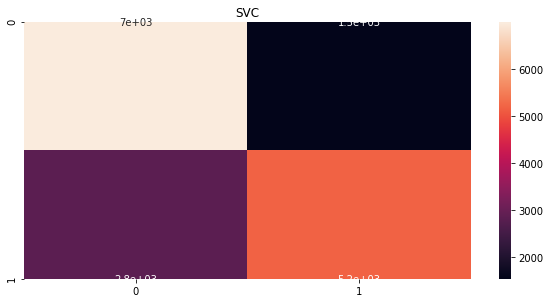

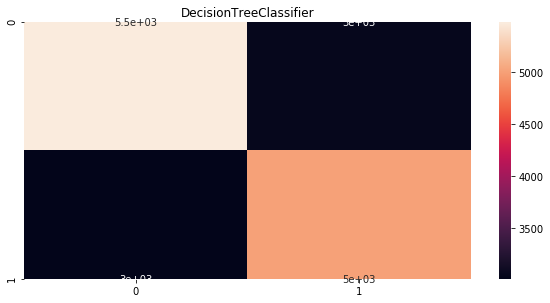

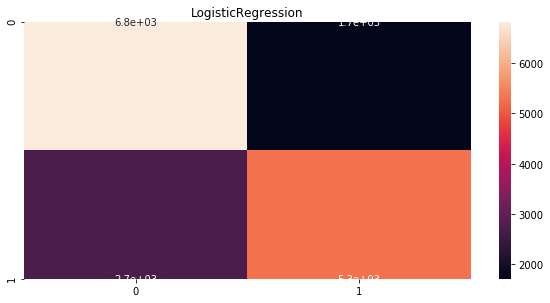

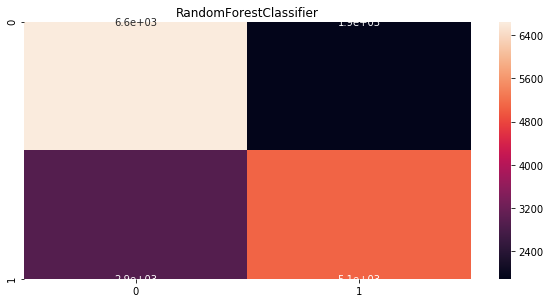

In [25]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************',name,'*************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,y_pred)
    print('Accuracy Score = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,y_pred))
    print('\n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

# BEST MODEL

In [26]:
result=pd.DataFrame({'Model ':Model,'Accuracy Score ':score,'Cross_Val_Score':cvs})
result

,Model,Accuracy Score,Cross_Val_Score
0,KNeighborsClassifier,71.653972,71.060937
1,SVC,73.673075,73.268039
2,DecisionTreeClassifier,63.438520,57.192606
3,LogisticRegression,73.177367,72.580703
4,RandomForestClassifier,70.892274,64.671680


I choose SVC for this dataset.

# PICKLE

In [27]:
joblib.dump(sv,'heartcardio.pkl')

['heartdisease.pkl']